# Data Preparation

In [100]:
import pandas as pd

all_games_df = pd.read_csv("data/all_games.csv")

In [101]:
all_games_df = all_games_df[(all_games_df["WL_A"] != " ")]
all_games_df.dropna(inplace=True)
all_games_df

,Unnamed: 0,SEASON_ID,TEAM_ID_A,TEAM_ABBREVIATION_A,TEAM_NAME_A,GAME_ID,GAME_DATE,MATCHUP_A,WL_A,MIN_A,...,FT_PCT_B,OREB_B,DREB_B,REB_B,AST_B,STL_B,BLK_B,TOV_B,PF_B,PLUS_MINUS_B
0,7,22023,1610612737,ATL,Atlanta Hawks,22301159,2024-04-10,ATL vs. CHA,L,240,...,0.955,5.0,28.0,33.0,25,11.0,2,13,18,1.0
1,9,22023,1610612737,ATL,Atlanta Hawks,22301147,2024-04-09,ATL vs. MIA,L,292,...,0.714,5.0,41.0,46.0,29,8.0,3,18,16,6.0
2,15,22023,1610612737,ATL,Atlanta Hawks,22301104,2024-04-03,ATL vs. DET,W,240,...,0.810,8.0,29.0,37.0,24,14.0,3,10,13,-8.0
3,19,22023,1610612737,ATL,Atlanta Hawks,22301076,2024-03-30,ATL vs. MIL,L,239,...,0.800,6.0,34.0,40.0,27,7.0,5,10,18,9.0
4,21,22023,1610612737,ATL,Atlanta Hawks,22301060,2024-03-28,ATL vs. BOS,W,265,...,0.857,9.0,34.0,43.0,28,7.0,6,12,15,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52468,210108,21996,1610612766,CHH,Charlotte Hornets,29600141,1996-11-20,CHH vs. NYK,W,240,...,0.778,8.0,29.0,37.0,14,4.0,5,20,31,-7.0
52469,210110,21996,1610612766,CHH,Charlotte Hornets,29600107,1996-11-15,CHH vs. CHI,L,240,...,0.786,14.0,31.0,45.0,29,9.0,3,20,16,23.0
52470,210116,21996,1610612766,CHH,Charlotte Hornets,29600064,1996-11-09,CHH vs. MIL,L,240,...,0.727,10.0,27.0,37.0,17,5.0,3,11,27,2.0
52471,210120,21996,1610612766,CHH,Charlotte Hornets,29600044,1996-11-06,CHH vs. LAL,W,239,...,0.727,9.0,31.0,40.0,22,1.0,7,16,19,-10.0


In [102]:
output_a_features = [
    "FTM_A",
    "OREB_A",
    "DREB_A",
    "REB_A",
    "AST_A",
]
output_b_features = [word.replace("_A", "_B") for word in output_a_features]
output_features = output_a_features + output_b_features

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

import tensorflow as tf

recorded_games = all_games_df[all_games_df["WL_A"] != " "]

X_input = np.asarray(recorded_games[output_features])
y_output = recorded_games["WL_A"]


y_output.replace("L", 0, inplace=True)
y_output.replace("W", 1, inplace=True)

X_input = np.asarray(X_input).astype(np.float32)
y_output = np.asarray(y_output).astype(np.int32)

recorded_games[output_features + ["WL_A"]]
recorded_games[(recorded_games["WL_A"] == 0.0) | (recorded_games["WL_A"] == 1.0)]

/tmp/ipykernel_314868/2286081454.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_output.replace("W", 1, inplace=True)


,FG_PCT_A,FG3_PCT_A,FTM_A,OREB_A,DREB_A,REB_A,AST_A,FG_PCT_B,FG3_PCT_B,FTM_B,OREB_B,DREB_B,REB_B,AST_B,WL_A
0,0.524,0.450,10,7.0,31.0,38.0,35,0.506,0.389,21,5.0,28.0,33.0,25,0
1,0.398,0.217,11,17.0,42.0,59.0,28,0.477,0.400,15,5.0,41.0,46.0,29,0
2,0.544,0.342,10,6.0,42.0,48.0,36,0.457,0.333,17,8.0,29.0,37.0,24,1
3,0.457,0.400,15,9.0,30.0,39.0,24,0.551,0.286,28,6.0,34.0,40.0,27,0
4,0.490,0.341,6,17.0,36.0,53.0,24,0.479,0.389,18,9.0,34.0,43.0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52468,0.440,0.400,23,8.0,27.0,35.0,25,0.441,0.385,21,8.0,29.0,37.0,14,1
52469,0.382,0.318,12,13.0,22.0,35.0,27,0.554,0.438,11,14.0,31.0,45.0,29,0
52470,0.485,0.313,27,8.0,26.0,34.0,24,0.473,0.429,24,10.0,27.0,37.0,17,0
52471,0.413,0.294,17,16.0,24.0,40.0,25,0.458,0.235,8,9.0,31.0,40.0,22,1


,Unnamed: 0,SEASON_ID,TEAM_ID_A,TEAM_ABBREVIATION_A,TEAM_NAME_A,GAME_ID,GAME_DATE,MATCHUP_A,WL_A,MIN_A,...,FT_PCT_B,OREB_B,DREB_B,REB_B,AST_B,STL_B,BLK_B,TOV_B,PF_B,PLUS_MINUS_B
0,7,22023,1610612737,ATL,Atlanta Hawks,22301159,2024-04-10,ATL vs. CHA,0,240,...,0.955,5.0,28.0,33.0,25,11.0,2,13,18,1.0
1,9,22023,1610612737,ATL,Atlanta Hawks,22301147,2024-04-09,ATL vs. MIA,0,292,...,0.714,5.0,41.0,46.0,29,8.0,3,18,16,6.0
2,15,22023,1610612737,ATL,Atlanta Hawks,22301104,2024-04-03,ATL vs. DET,1,240,...,0.810,8.0,29.0,37.0,24,14.0,3,10,13,-8.0
3,19,22023,1610612737,ATL,Atlanta Hawks,22301076,2024-03-30,ATL vs. MIL,0,239,...,0.800,6.0,34.0,40.0,27,7.0,5,10,18,9.0
4,21,22023,1610612737,ATL,Atlanta Hawks,22301060,2024-03-28,ATL vs. BOS,1,265,...,0.857,9.0,34.0,43.0,28,7.0,6,12,15,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52468,210108,21996,1610612766,CHH,Charlotte Hornets,29600141,1996-11-20,CHH vs. NYK,1,240,...,0.778,8.0,29.0,37.0,14,4.0,5,20,31,-7.0
52469,210110,21996,1610612766,CHH,Charlotte Hornets,29600107,1996-11-15,CHH vs. CHI,0,240,...,0.786,14.0,31.0,45.0,29,9.0,3,20,16,23.0
52470,210116,21996,1610612766,CHH,Charlotte Hornets,29600064,1996-11-09,CHH vs. MIL,0,240,...,0.727,10.0,27.0,37.0,17,5.0,3,11,27,2.0
52471,210120,21996,1610612766,CHH,Charlotte Hornets,29600044,1996-11-06,CHH vs. LAL,1,239,...,0.727,9.0,31.0,40.0,22,1.0,7,16,19,-10.0


In [104]:
from imblearn.over_sampling import SMOTE

resample = SMOTE()
X_input, y_output = resample.fit_resample(X_input, y_output)

In [105]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# y_cleaned = y_output[~np.isnan(X_input)]
# X_cleaned = X_input[all(~np.isnan(X_input))]
X_truth = ~np.isnan(X_input).any(axis=1)
y_truth = (y_output == 0) | (y_output == 1)
y_cleaned = y_output[X_truth & y_truth]
X_cleaned = X_input[X_truth & y_truth]

In [106]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=3
)



# Scaling Data

In [107]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib
import sys
from joblib import dump
import pickle
from sklearn.preprocessing import Normalizer, StandardScaler



scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

# Assuming `scaler` is your fitted StandardScaler instance
with open('scaler2.bin', 'wb') as f:
    pickle.dump(scaler, f)


In [108]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

# With Tuning

In [109]:
import keras_tuner as kt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow import keras

def model_builder(hp):
    model = Sequential()

    hp_units = hp.Int("units", min_value=16, max_value=128, step=32)

    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    activations = hp.Choice("activation", values=["relu", "tanh"])
    final_activation = hp.Choice("activation", values=["sigmoid", "softmax"])

    model.add(keras.Input(shape=(14,)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float("dropout", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp_units, activation=activations))
    model.add(Dropout(hp.Float("dropout", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp_units, activation=activations))
    model.add(Dropout(hp.Float("dropout", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(2, activation="sigmoid"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model




tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective("val_accuracy", direction="max"),
    max_epochs=10,
    factor=3,
    directory="my_dir",
    project_name="third",
)

print(tuner)

stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

tuner.search(X_train, y_train, epochs=5,
             validation_split=0.2, callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

print(best_hps)

print(
    f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
"""
)

Trial 30 Complete [00h 00m 16s]
val_accuracy: 0.8858824968338013

Best val_accuracy So Far: 0.9071919322013855
Total elapsed time: 00h 03m 03s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 80 and the optimal learning rate for the optimizer
is 0.01.



In [110]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
# results = model.fit(X_train, y_train, epochs=50, validation_split=0.2)
results = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])


Epoch 1/50
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.8575 - loss: 0.3214 - val_accuracy: 0.9019 - val_loss: 0.2393
Epoch 2/50
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8803 - loss: 0.2816 - val_accuracy: 0.9017 - val_loss: 0.2308
Epoch 3/50
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8838 - loss: 0.2699 - val_accuracy: 0.9056 - val_loss: 0.2228
Epoch 4/50
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8827 - loss: 0.2714 - val_accuracy: 0.9038 - val_loss: 0.2305
Epoch 5/50
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8814 - loss: 0.2723 - val_accuracy: 0.9040 - val_loss: 0.2269
Epoch 6/50
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8850 - loss: 0.2656 - val_accuracy: 0.9090 - val_loss: 0.2287
Epoch 7/50
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8806 - loss: 0.2776 - val_accuracy: 0.8991 - val_loss: 0.2315
Epoch 8/50
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.8866 - loss: 0.2678 - val_accuracy

Best epoch: 6
Best Neural Network accuracy: 89.91%
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
Best epoch: 6
Best Neural Network accuracy: 89.91%
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
Best Neural Network classification report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4475
           1       0.90      0.90      0.90      4441

    accuracy                           0.90      8916
   macro avg       0.90      0.90      0.90      8916
weighted avg       0.90      0.90      0.90      8916



<AxesSubplot:>

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

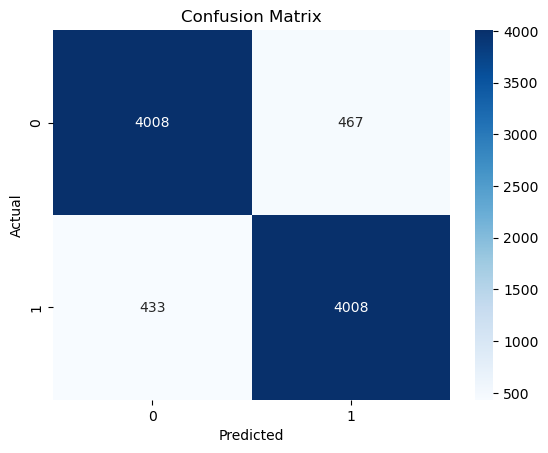

Best Neural Network classification report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4475
           1       0.90      0.90      0.90      4441

    accuracy                           0.90      8916
   macro avg       0.90      0.90      0.90      8916
weighted avg       0.90      0.90      0.90      8916



<AxesSubplot:>

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

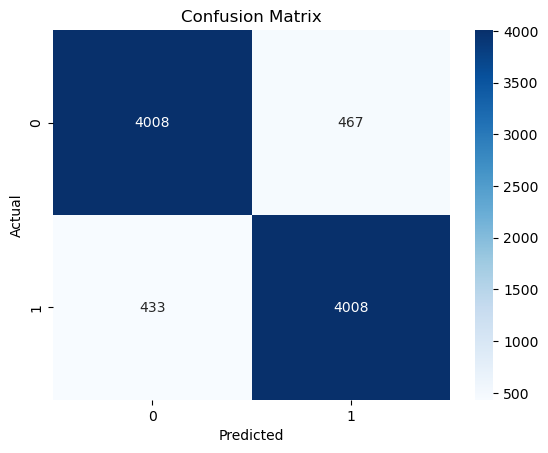

In [111]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

val_acc_per_epoch = results.history["val_accuracy"]
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print("Best epoch: %d" % (best_epoch,))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Best Neural Network accuracy: {accuracy * 100:.2f}%")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Evaluate the modelimport numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

val_acc_per_epoch = results.history["val_accuracy"]
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print("Best epoch: %d" % (best_epoch,))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Best Neural Network accuracy: {accuracy * 100:.2f}%")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Evaluate the model
print('Best Neural Network classification report:')
print(classification_report(y_test_true, y_pred))

# Confusion matrix
conf_matrix_nn = confusion_matrix(y_test_true, y_pred)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Best Neural Network classification report:')
print(classification_report(y_test_true, y_pred))

# Confusion matrix
conf_matrix_nn = confusion_matrix(y_test_true, y_pred)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

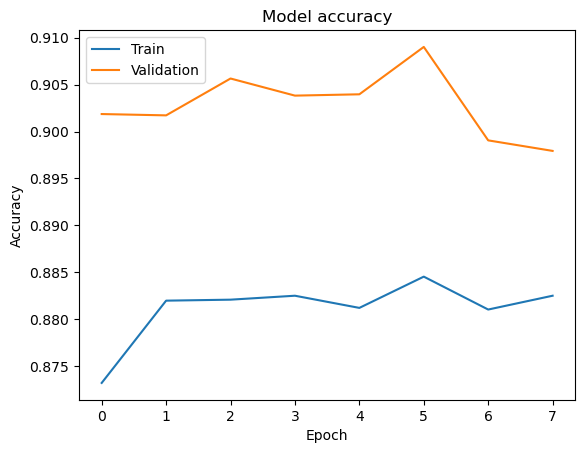

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

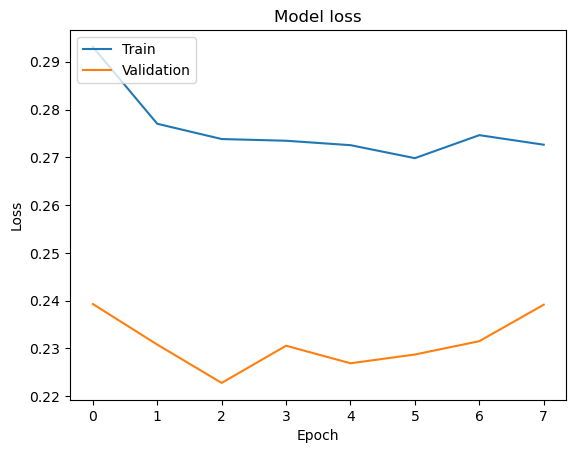

In [112]:
# history = model.fit(X_train, y_train, epochs=70, validation_split=0.2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [113]:
json_model = model.to_json()
with open("tuned_nn2.json", "w") as json_file:
    json_file.write(json_model)
# serialize weights to HDF5
model.save_weights("tuned2.weights.h5")
print("Saved model to disk")

5274

Saved model to disk


In [114]:
from tensorflow.keras.models import model_from_json

# load json and create model
json_file = open("tuned_nn2.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("tuned2.weights.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

Loaded model from disk


In [17]:
# print(loaded_model.predict(X_test[0]))
# print(len(X_test))
X_test[0]

array([-0.12796563, -0.37922123, -1.7140071 , -1.3632866 ,  1.356431  ,
        0.2401674 ,  0.41703546,  0.72311115, -0.53644377,  0.6887569 ,
       -1.0903503 ,  2.63344   ,  1.5322409 ,  1.3005766 ], dtype=float32)